# Zillow Predictive Power: House Price Prediction Model


#### Created a house price prediction model using Zillow data, incorporating advanced machine learning techniques to analyze factors like location, square footage, number of bedrooms, and market conditions. The model aims to predict home prices with high accuracy, offering valuable insights for real estate investors, buyers, and sellers to optimize their decision-making processes and stay ahead of market trends.

In [1]:
# Import necessary libraries
import numpy as np   # numpy is a library for numerical operations and handling arrays
import pandas as pd  # pandas is used for data manipulation and analysis, providing data structures like DataFrame
from sklearn.datasets import make_classification  # used to generate synthetic classification datasets for testing and evaluation
from sklearn.model_selection import train_test_split  # splits the dataset into training and testing sets for model evaluation
from sklearn.preprocessing import StandardScaler  # standardizes features by removing the mean and scaling to unit variance
from sklearn.ensemble import RandomForestClassifier  # an ensemble classifier that uses multiple decision trees for classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix  # metrics to evaluate model performance
import matplotlib.pyplot as plt  # used for creating static, animated, and interactive visualizations in Python
import seaborn as sns  # a data visualization library based on matplotlib for creating attractive and informative statistical graphics
from sklearn.svm import SVC  # support vector classifier for classification tasks, used for both linear and non-linear classification


## Data Exploration and Preparation

### Data Set Acquisition

#### Source of data: https://github.com/takeo-quantumleap/bda58-zillow-predictive-power-house-price-prediction-model-bda58-s926832

In [3]:
#Read the dataset
#Specify the local directory address where the dataset is stored
dataset = pd.read_csv((r'C:\Users\macma\OneDrive\Desktop\Data Analytics\Projects and Assignments\Zillow housing data_csv.csv')) 

In [4]:
df = pd.DataFrame(dataset)  # converts the dataset into a pandas DataFrame for easier data manipulation and analysis


In [5]:
df #Prints the data frame

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [6]:
# Display basic information about the dataset
print("Data Information:")
df.info()

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
# Display the first few rows of the dataframe
print("\nFirst 5 Rows of the DataFrame:")
print(df.head())


First 5 Rows of the DataFrame:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  



### Data Cleaning
#### Proper handling of missing values, outliers, and data inconsistencies

In [31]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
price                              0
area                               0
bedrooms                           0
bathrooms                          0
stories                            0
parking                            0
mainroad_yes                       0
guestroom_yes                      0
basement_yes                       0
hotwaterheating_yes                0
airconditioning_yes                0
prefarea_yes                       0
furnishingstatus_furnished         0
furnishingstatus_semi-furnished    0
furnishingstatus_unfurnished       0
price_per_sqft                     0
dtype: int64


In [32]:
# Check for duplicate rows
print("\nDuplicate Rows:")
print(df.duplicated().sum())


Duplicate Rows:
0


In [33]:
# Drop duplicate rows if any
df = df.drop_duplicates()

In [34]:
# Handle missing values (example: filling or dropping)
# Fill numeric columns with mean, categorical columns with mode
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = df[col].fillna(df[col].mean())

for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Confirm that no missing values remain
print("\nMissing Values After Handling:")
print(df.isnull().sum())


Missing Values After Handling:
price                              0
area                               0
bedrooms                           0
bathrooms                          0
stories                            0
parking                            0
mainroad_yes                       0
guestroom_yes                      0
basement_yes                       0
hotwaterheating_yes                0
airconditioning_yes                0
prefarea_yes                       0
furnishingstatus_furnished         0
furnishingstatus_semi-furnished    0
furnishingstatus_unfurnished       0
price_per_sqft                     0
dtype: int64


### Feature Engineering
#### Creativity and effictiveness in creating new features and selecting relevant features

In [35]:
# Check if 'furnishingstatus' is in the DataFrame columns before processing
categorical_columns = df.select_dtypes(include=['object']).columns  # selects columns with categorical data types (object)

# Perform one-hot encoding for all other categorical columns except 'furnishingstatus'
if 'furnishingstatus' in categorical_columns:
    categorical_columns = categorical_columns.drop('furnishingstatus')  # exclude 'furnishingstatus' to handle it separately

df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)  # one-hot encode remaining categorical columns, dropping the first category

# Check again if 'furnishingstatus' exists before encoding
if 'furnishingstatus' in df.columns:
    # One-hot encoding for 'furnishingstatus' without dropping the first category
    df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=False)  # include all three categories for 'furnishingstatus'
else:
    print("'furnishingstatus' column is not present in the DataFrame.")

# Feature engineering: Create new feature - Price per square foot
if 'price' in df.columns and 'area' in df.columns:  # checks if both 'price' and 'area' columns exist in the DataFrame
    df['price_per_sqft'] = df['price'] / df['area']  # creates a new feature by dividing the price by the area

# Display the first few rows of the engineered dataframe
print("\nDataFrame after Feature Engineering:")  # prints a message indicating the display of the engineered DataFrame
print(df.head())  # prints the first five rows of the DataFrame to show the engineered features


'furnishingstatus' column is not present in the DataFrame.

DataFrame after Feature Engineering:
      price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0  13300000  7420         4          2        3        2          True   
1  12250000  8960         4          4        4        3          True   
2  12250000  9960         3          2        2        2          True   
3  12215000  7500         4          2        2        3          True   
4  11410000  7420         4          1        2        2          True   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0          False         False                False                 True   
1          False         False                False                 True   
2          False          True                False                False   
3          False          True                False                 True   
4           True          True                False                 True   

 

In [36]:
df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,price_per_sqft
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,True,False,False,1792.452830
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,True,False,False,1367.187500
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,False,True,False,1229.919679
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,True,False,False,1628.666667
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,True,False,False,1537.735849


### Data Splitting
#### Correctly splitting the data into training and testing sets with a clear rationale.

In [37]:
from sklearn.model_selection import train_test_split  # used to split the dataset into training and testing subsets

# Define the target variable and feature variables
# Assuming 'price' is the target variable
X = df.drop('price', axis=1)  # drops the 'price' column to use the rest as feature variables (X)
y = df['price']  # selects 'price' column as the target variable (y)

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # splits the data into training and testing sets with a 70-30 ratio

# Display the shape of the split data
print(f"Training set shape: {X_train.shape}, {y_train.shape}")  # prints the shape of the training feature set and target set
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")  # prints the shape of the testing feature set and target set


Training set shape: (381, 15), (381,)
Testing set shape: (164, 15), (164,)


## Model Development
### Model Selection
#### Selection of appropriate regression models and justification for choices

In [15]:
from sklearn.linear_model import LinearRegression  # import linear regression model for linear relationships
from sklearn.ensemble import RandomForestRegressor  # import random forest model for non-linear regression using multiple decision trees
from sklearn.svm import SVR  # import support vector regressor for regression tasks using various kernel functions

# Initialize the models
models = {
    "Linear Regression": LinearRegression(),  # instantiate linear regression model
    "Random Forest": RandomForestRegressor(random_state=42),  # instantiate random forest regressor with fixed random state for reproducibility
    "Support Vector Machine": SVR(kernel='rbf')  # instantiate SVR with RBF kernel for non-linear regression
}

# Display the initialized models
for name, model in models.items():  # iterate over models dictionary and print the name and confirmation of each initialized model
    print(f"{name} model initialized.")


Linear Regression model initialized.
Random Forest model initialized.
Support Vector Machine model initialized.


### Model Traning
#### Use of appropriate evaluation metrics and thorough analysis of model performance.

In [38]:
# Model Training
for name, model in models.items():  # iterate over each model in the models dictionary
    model.fit(X_train, y_train)  # train the model using the training data
    print(f"{name} model trained.")  # print confirmation that the model has been trained


Linear Regression model trained.
Random Forest model trained.
Support Vector Machine model trained.


### Model Evaluation 
#### Use of appropriate evaluation metrics and thorough analysis of model performance.

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_error, mean_absolute_error, r2_score, mean_squared_error, mean_absolute_error, r2_score

# Import the new root_mean_squared_error function (available in sklearn >= 1.4)
from sklearn.metrics import root_mean_squared_error  # available in sklearn >= 1.4

# Function to evaluate models
def evaluate_model(model, X_test, y_test):  # function to compute evaluation metrics for a given model
    y_pred = model.predict(X_test)  # predict target values using the test data
    rmse = root_mean_squared_error(y_test, y_pred)  # calculate root mean squared error (RMSE)
    mae = mean_absolute_error(y_test, y_pred)  # calculate mean absolute error (MAE)
    r2 = r2_score(y_test, y_pred)  # calculate R-squared (coefficient of determination)
    return {"RMSE": rmse, "MAE": mae, "R²": r2}  # return the calculated metrics as a dictionary

# Evaluate each model
for name, model in models.items():  # iterate over each model in the models dictionary
    metrics = evaluate_model(model, X_test, y_test)  # evaluate the model using the test data
    print(f"\n{name} Model Evaluation Metrics:")  # print the name of the model
    print(metrics)  # print the evaluation metrics



Linear Regression Model Evaluation Metrics:
{'RMSE': 741630.8525787288, 'MAE': 514913.24822362873, 'R²': 0.8722790628112579}

Random Forest Model Evaluation Metrics:
{'RMSE': 522162.37268911296, 'MAE': 274828.1865853658, 'R²': 0.9366863041394777}

Support Vector Machine Model Evaluation Metrics:
{'RMSE': 2112383.6644996717, 'MAE': 1578104.3580628808, 'R²': -0.036172638849426564}


### Model Refinement and Reporting

#### Model Optimization

In [18]:
from sklearn.model_selection import GridSearchCV  # used for hyperparameter tuning to find the best model parameters through exhaustive search

# Example of hyperparameter tuning for Random Forest
param_grid = {  # defines the hyperparameter grid for tuning
    'n_estimators': [100, 200],  # number of trees in the forest
    'max_depth': [None, 10, 20],  # maximum depth of each tree
    'min_samples_split': [2, 5],  # minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2]  # minimum number of samples required to be at a leaf node
}

# GridSearchCV for Random Forest
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=2)  # performs exhaustive search over the parameter grid using cross-validation
grid_search.fit(X_train, y_train)  # fits the model with all parameter combinations on the training data

# Best parameters from GridSearchCV
print("\nBest parameters found for Random Forest:")  # displays the best parameters found by GridSearchCV
print(grid_search.best_params_)  # prints the optimal set of hyperparameters for the Random Forest model


Fitting 3 folds for each of 24 candidates, totalling 72 fits

Best parameters found for Random Forest:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


###  Model Interpretation
#### Use feature importance, SHAP values, or other techniques to interpret model behavior.

In [19]:
# Feature importance for Random Forest model
best_rf = grid_search.best_estimator_  # retrieves the best Random Forest model found by GridSearchCV
feature_importances = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)  # creates a Series of feature importances and sorts them in descending order

# Display feature importance
print("\nFeature Importances from Random Forest Model:")  # prints a message indicating feature importance results
print(feature_importances)  # prints the sorted feature importances to show the contribution of each feature to the model



Feature Importances from Random Forest Model:
area                               0.540465
price_per_sqft                     0.407366
bathrooms                          0.014299
parking                            0.008435
bedrooms                           0.006957
airconditioning_yes                0.005618
furnishingstatus_unfurnished       0.004379
stories                            0.003122
prefarea_yes                       0.002395
basement_yes                       0.001916
furnishingstatus_semi-furnished    0.001716
furnishingstatus_furnished         0.001708
guestroom_yes                      0.000737
hotwaterheating_yes                0.000484
mainroad_yes                       0.000403
dtype: float64


 ### Reporting and Documentation
#### Quality of documentation in the Jupyter notebook, including clarity, completeness, and presentation of insights.


In [20]:
# Display summary of findings
print("\nModel Performance Summary:")
for name, model in models.items():
    metrics = evaluate_model(model, X_test, y_test)
    print(f"{name}: RMSE = {metrics['RMSE']}, MAE = {metrics['MAE']}, R² = {metrics['R²']}")

# Additional documentation could include exporting results, visualizations, and explanations.



Model Performance Summary:
Linear Regression: RMSE = 741630.8525787288, MAE = 514913.24822362873, R² = 0.8722790628112579
Random Forest: RMSE = 522162.37268911296, MAE = 274828.1865853658, R² = 0.9366863041394777
Support Vector Machine: RMSE = 2112383.6644996717, MAE = 1578104.3580628808, R² = -0.036172638849426564


Correlation Matrix:
                                     price      area  bedrooms  bathrooms  \
price                            1.000000  0.535997  0.366494   0.517545   
area                             0.535997  1.000000  0.151858   0.193820   
bedrooms                         0.366494  0.151858  1.000000   0.373930   
bathrooms                        0.517545  0.193820  0.373930   1.000000   
stories                          0.420712  0.083996  0.408564   0.326165   
parking                          0.384394  0.352980  0.139270   0.177496   
mainroad_yes                     0.296898  0.288874 -0.012033   0.042398   
guestroom_yes                    0.255517  0.140297  0.080549   0.126469   
basement_yes                     0.187057  0.047417  0.097312   0.102106   
hotwaterheating_yes              0.093073 -0.009229  0.046049   0.067159   
airconditioning_yes              0.452954  0.222393  0.160603   0.186915   
prefarea_yes                     0.329777  0.234779  0.079023   0.0

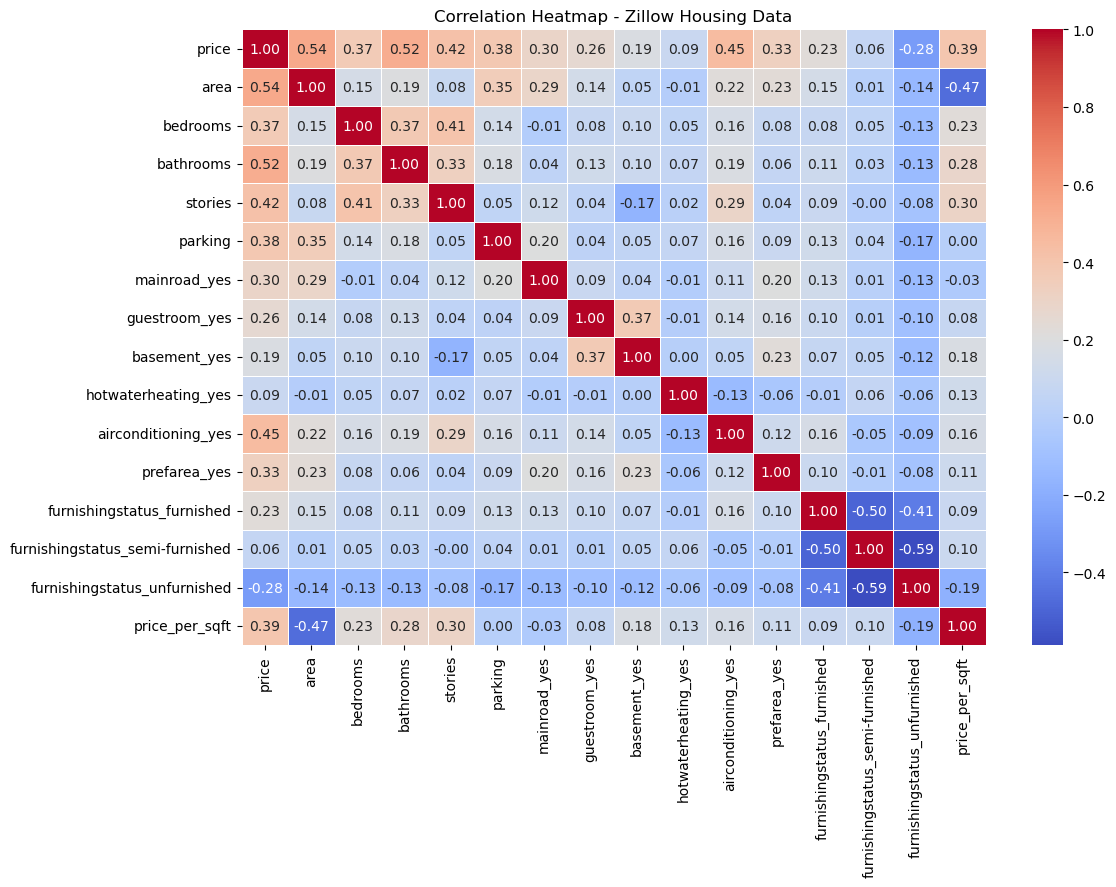

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_full_encoded is the fully preprocessed and encoded DataFrame from previous steps
# If not, make sure to preprocess and encode your data as per previous instructions.

# Calculate the correlation matrix
corr_matrix = df.corr()

# Display the correlation matrix
print("Correlation Matrix:\n", corr_matrix)

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))  # Set the size of the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap - Zillow Housing Data")
plt.show()


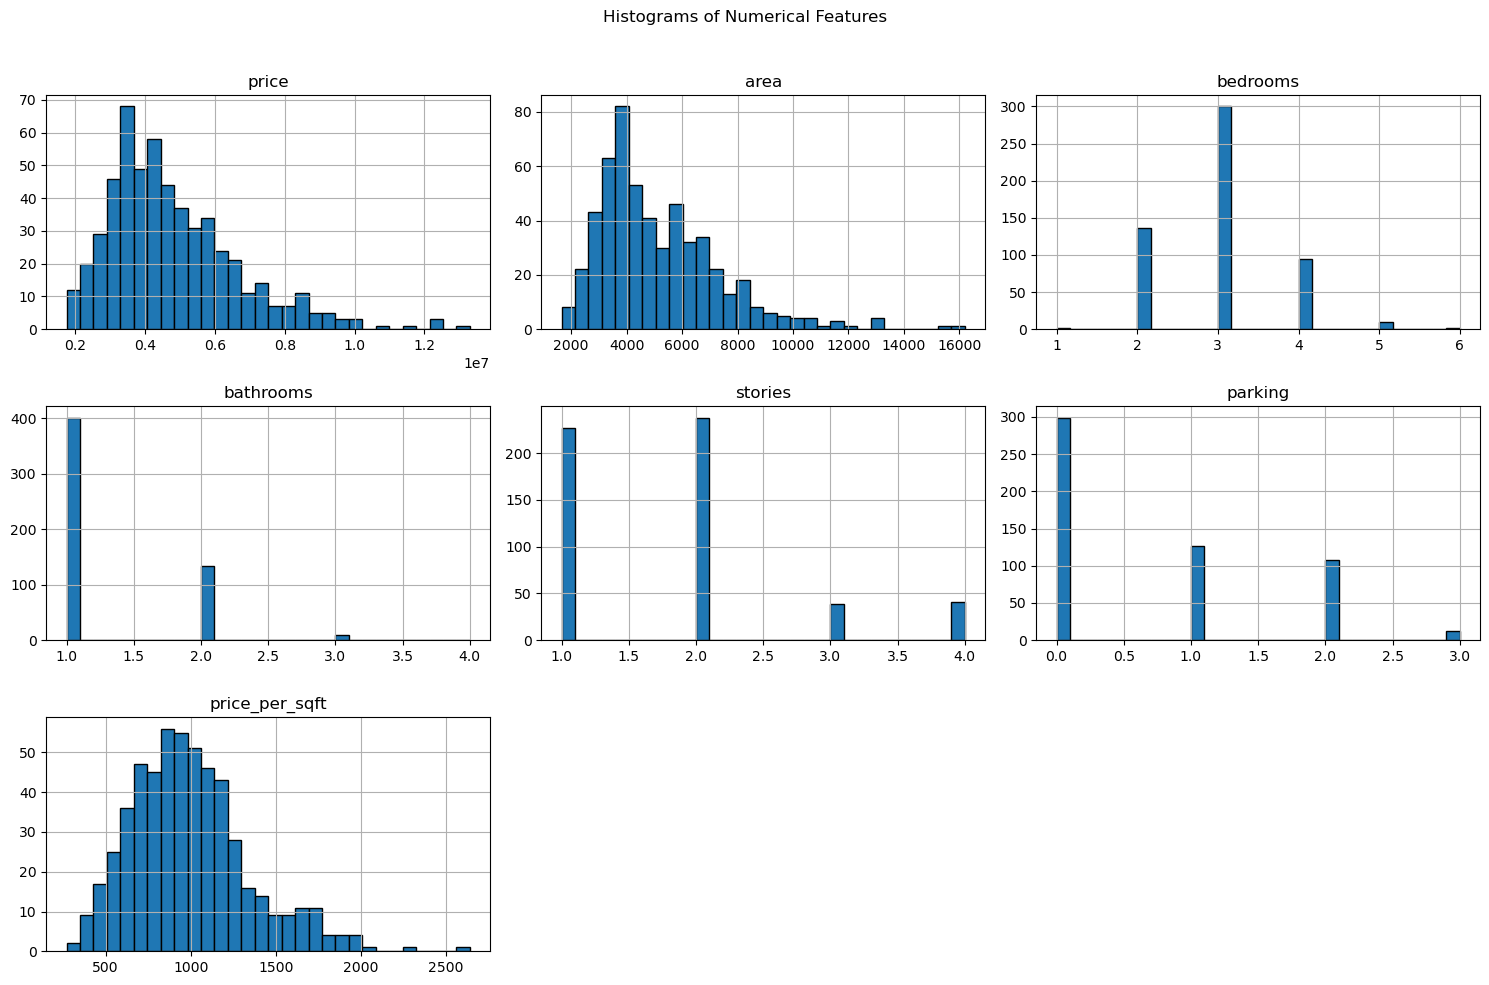

In [41]:
# Purpose: Plot histograms for numerical features to visualize their distributions
df.hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


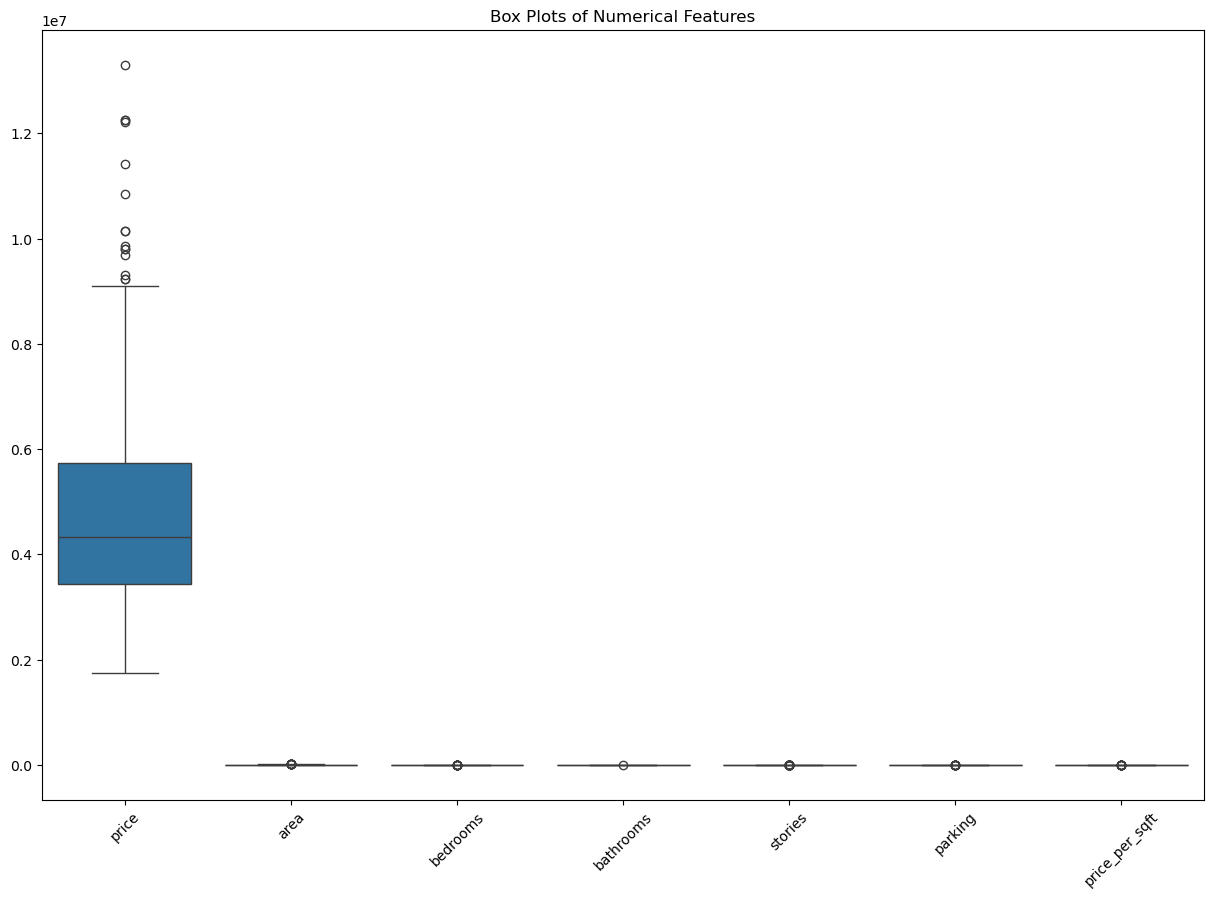

In [22]:
# Purpose: Create box plots for numerical features to identify outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.title("Box Plots of Numerical Features")
plt.xticks(rotation=45)
plt.show()


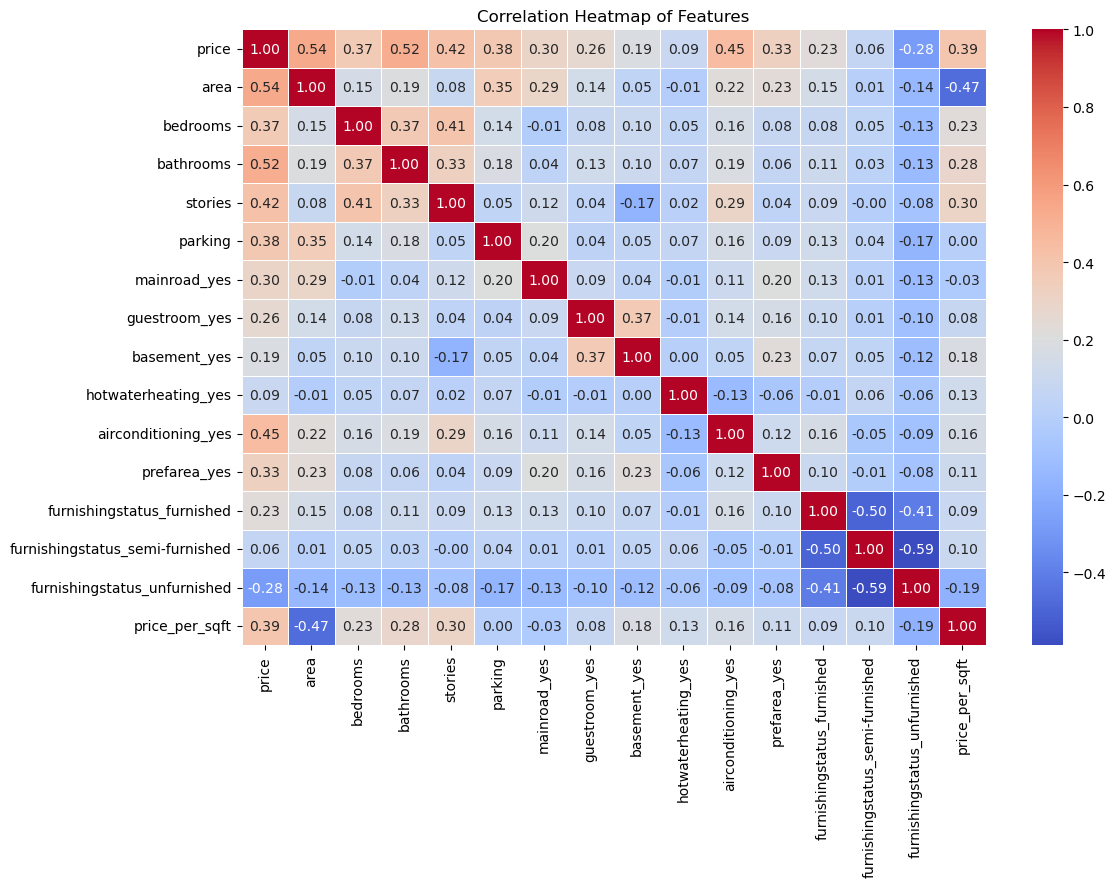

In [26]:
# Purpose: Visualize the correlation matrix to identify strongly correlated features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()


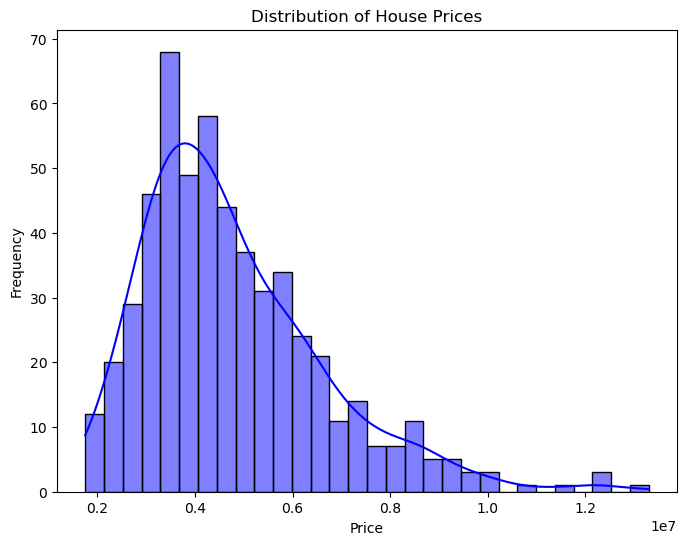

In [27]:
# Purpose: Plot the distribution of the target variable 'price' to understand its spread and skewness
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], bins=30, kde=True, color='blue')
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


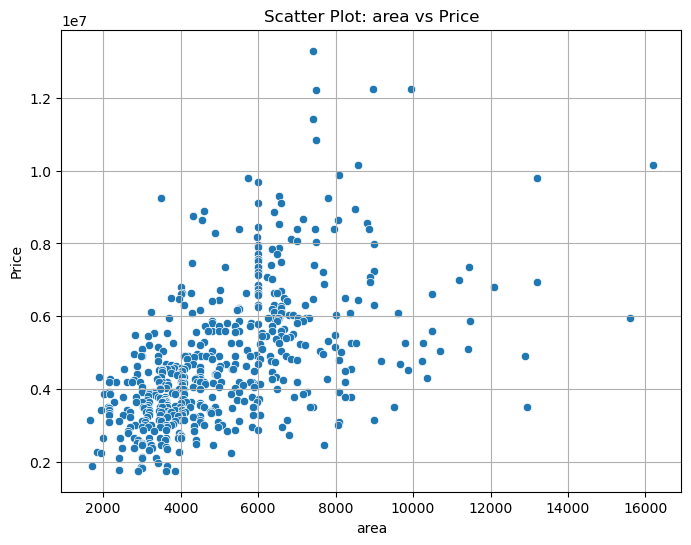

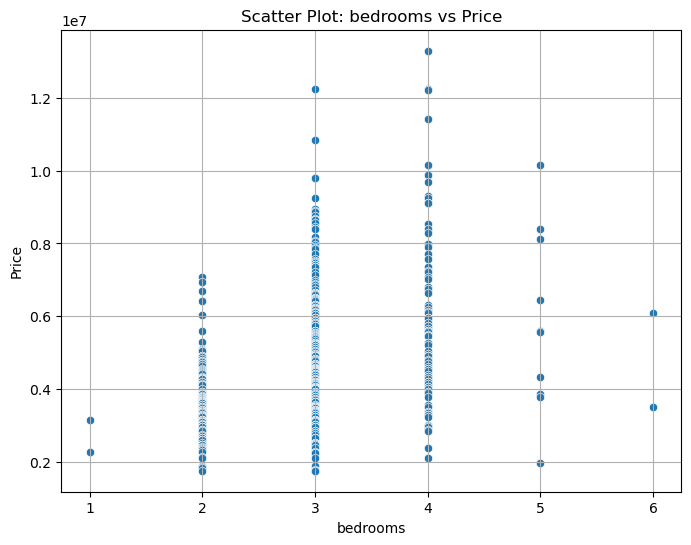

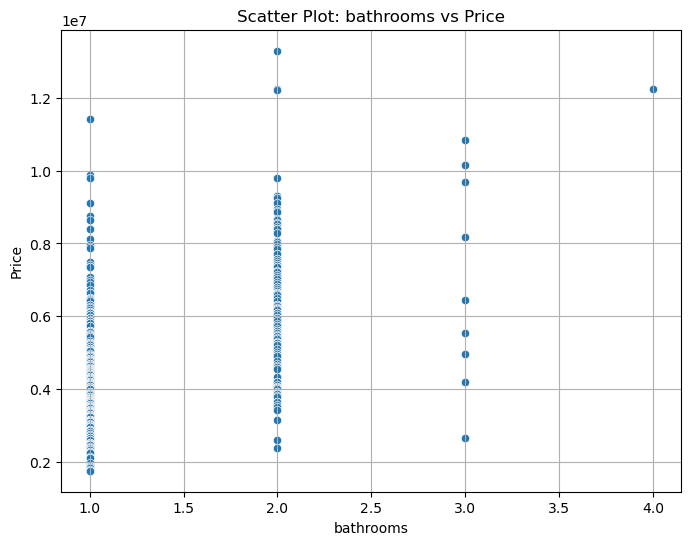

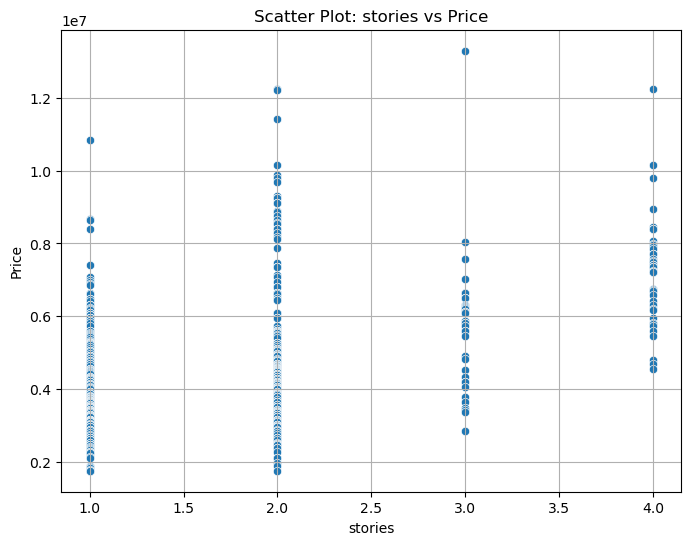

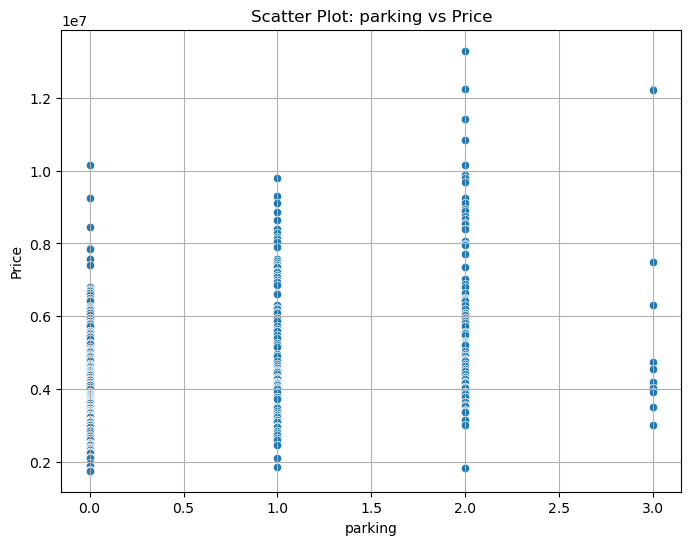

In [28]:
# Purpose: Create scatter plots for key features against the target variable 'price' to visualize relationships
key_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']  # Choose key features for visualization

for feature in key_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[feature], y=df['price'])
    plt.title(f'Scatter Plot: {feature} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()
